In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import os 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [11]:
df = pd.read_csv("FedCycleData071012 (2).csv", dtype=str, skipinitialspace=True, keep_default_na=False)
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [12]:
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 1665, Columns: 80


In [13]:
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [15]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

ClientID : ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nfp8

In [40]:
# Normalize whitespace and map NA-like tokens to actual NA
na_like = {"", "na", "n/a", "none", "null", "nil", "nan", ".", "?", "-", "--"}
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df = df.map(
    lambda x: pd.NA if isinstance(x, str) and (x == "" or x.lower() in na_like) else x
)

# Now real nulls will show up:
null_counts = df.isna().sum().sort_values(ascending=False)
print(null_counts)

MensesScoreDay13        1664
MensesScoreDay15        1664
MensesScoreDay14        1664
MensesScoreDay12        1664
MensesScoreDay11        1663
                        ... 
LengthofCycle              0
ReproductiveCategory       0
CycleWithPeakorNot         0
Group                      0
ClientID                   0
Length: 80, dtype: int64


In [41]:
# threshold for null values 
THRESHOLD = 0.50  

# Compute null counts/percentages
null_summary = (
    df.isna()
      .sum()
      .to_frame("null_count")
      .assign(NullPct=lambda s: s["null_count"] / len(df))
      .sort_values("NullPct", ascending=False)
)

# Flag columns above threshold 
flag_mask = null_summary["NullPct"] > THRESHOLD
flagged_cols = null_summary[flag_mask].copy()
ok_cols = null_summary[~flag_mask].copy()

# show in percentages 
flagged_cols_display = flagged_cols.assign(NullPct=lambda s: (s["NullPct"]*100).round(2))
ok_cols_display = ok_cols.assign(NullPct=lambda s: (s["NullPct"]*100).round(2))

print("Columns > 50% missing:")
print(flagged_cols_display)

flagged_colnames = flagged_cols.index.tolist()

#columns count 
print(f"\nNumber of columns > {THRESHOLD*100}% missing: {len(flagged_colnames)}")


Columns > 50% missing:
                            null_count  NullPct
MensesScoreDay13                  1664    99.94
MensesScoreDay15                  1664    99.94
MensesScoreDay14                  1664    99.94
MensesScoreDay12                  1664    99.94
MensesScoreDay11                  1663    99.88
Urosurgeries                      1662    99.82
MensesScoreDayTen                 1659    99.64
Wedding                           1655    99.40
Gynosurgeries                     1639    98.44
MensesScoreDayNine                1639    98.44
Prevmethod                        1635    98.20
Methoddate                        1633    98.08
Girls                             1622    97.42
Boys                              1618    97.18
MedvitexplainM                    1605    96.40
MensesScoreDayEight               1597    95.92
LivingkidsM                       1585    95.20
IntercourseDuringUnusBleed        1583    95.08
PhasesBleeding                    1559    93.63
Medvitexplain    

## Decision 
Columns to Keep:
1. BMI, Height, Weight, Age, AgeM → demographics, strong predictors of reproductive health.
2. Abortions, Miscarriages, Numberpreg, Livingkids → key reproductive outcomes.
3. Ethnicity, Maristatus, Religion → confounding control in analysis
4. MeanCycleLength, MeanMensesLength, Reprocate → summarize reproductive physiology, worth keeping.
5. OccupationM, IncomeM, Schoolyears, SchoolyearsM → socioeconomic indicators 
6. Breastfeeding → clinically important for fertility.
7. Gynosurgeries, Urosurgeries, Medvits, MedvitsM

In [42]:
# Define helpers 
def is_yes_like(x):
    if pd.isna(x):
        return False
    s = str(x).strip().lower()
    return s in {"y", "yes", "true", "t", "1", "pos", "positive", "present"}

def is_no_like(x):
    if pd.isna(x):
        return False
    s = str(x).strip().lower()
    return s in {"n", "no", "false", "f", "0", "neg", "negative", "absent"}

def to_numeric(series):
    return pd.to_numeric(series, errors="coerce")

def safe_cols(df, cols):
    """Return only the columns from `cols` that actually exist in df (preserve order)."""
    return [c for c in cols if c in df.columns]

In [43]:
# Columns to Keep 
keep_numeric = [
    "BMI", "Height", "Weight", "Age", "AgeM",
    "MeanCycleLength", "MeanMensesLength"
]
keep_outcomes = ["Abortions", "Miscarriages", "Numberpreg", "Livingkids"]
keep_demo_cat = ["Ethnicity", "Maristatus", "Religion"]
keep_ses_cat = ["OccupationM", "IncomeM", "Schoolyears", "SchoolyearsM"]
keep_other = ["Breastfeeding", "Reprocate"]  # categorical/ordinal as provided
keep_medical_hist = ["Gynosurgeries", "Urosurgeries", "Medvits", "MedvitsM", "Medvitexplain", "MedvitexplainM"]

# unify list 
keep_cols_raw = keep_numeric + keep_outcomes + keep_demo_cat + keep_ses_cat + keep_other + keep_medical_hist
keep_cols = safe_cols(df, keep_cols_raw)

In [44]:

# Identify menses day score columns (Days 6–10)
day_words = {"Six", "Seven", "Eight", "Nine", "Ten"}
day_nums  = {"6", "7", "8", "9", "10"}

menses_cols_6_10 = []
for c in df.columns:
    if c.startswith("MensesScoreDay"):
        suffix = c.replace("MensesScoreDay", "")
        if suffix in day_words or suffix in day_nums:
            menses_cols_6_10.append(c)

In [45]:
# Feature Engineering 
df_eng = df.copy()

# Convert menses day 6–10 to numeric and build aggregates
if menses_cols_6_10:
    menses_numeric = df_eng[menses_cols_6_10].apply(to_numeric)
    df_eng["TotalMensesScore"] = menses_numeric.sum(axis=1, min_count=1)
    df_eng["MaxMensesIntensity"] = menses_numeric.max(axis=1)
    df_eng["DurationOfReportedBleeding"] = menses_numeric.notna().sum(axis=1)
else:
    # If none exist, create empty engineered columns (optional)
    df_eng["TotalMensesScore"] = pd.NA
    df_eng["MaxMensesIntensity"] = pd.NA
    df_eng["DurationOfReportedBleeding"] = pd.NA

# IntercourseDuringUnusBleed, PhasesBleeding → binary flags
for col, newcol in [
    ("IntercourseDuringUnusBleed", "IntercourseDuringUnusBleed_flag"),
    ("PhasesBleeding", "PhasesBleeding_flag")
]:
    if col in df_eng.columns:
        df_eng[newcol] = df_eng[col].apply(lambda x: 1 if is_yes_like(x) else 0)
    else:
        df_eng[newcol] = 0  # if column missing, default 0

# Medical history 
df_eng["any_surgery_flag"] = 0
for base in ["Gynosurgeries", "Urosurgeries"]:
    if base in df_eng.columns:
        df_eng["any_surgery_flag"] = df_eng["any_surgery_flag"] | df_eng[base].apply(lambda x: 1 if is_yes_like(x) else 0)

# any_med_treatment_flag: any of Medvits / MedvitsM / Medvitexplain / MedvitexplainM present or yes-like
med_cols = safe_cols(df_eng, ["Medvits", "MedvitsM", "Medvitexplain", "MedvitexplainM"])
if med_cols:
    any_med = pd.Series(0, index=df_eng.index)
    for c in med_cols:
        any_med = any_med | df_eng[c].apply(lambda x: 1 if (is_yes_like(x) or (isinstance(x, str) and x.strip() != "")) else 0)
    df_eng["any_med_treatment_flag"] = any_med.astype(int)
else:
    df_eng["any_med_treatment_flag"] = 0

# Unify Nextpreg / NextpregM 
def unify_nextpreg(row):
    vals = []
    if "Nextpreg" in row.index:
        vals.append(row["Nextpreg"])
    if "NextpregM" in row.index:
        vals.append(row["NextpregM"])
    # If any says YES → 1; if both explicitly NO → 0; else NA → 0 (conservative) or pd.NA
    if any(is_yes_like(v) for v in vals):
        return 1
    if all(is_no_like(v) for v in vals if pd.notna(v)):
        return 0
    # ambiguous / missing → treat as 0 (you can switch to pd.NA if desired)
    return 0

df_eng["Nextpreg_unified_flag"] = df_eng.apply(unify_nextpreg, axis=1)

In [46]:
# Final feature set
engineered_cols = [
    "TotalMensesScore", "MaxMensesIntensity", "DurationOfReportedBleeding",
    "IntercourseDuringUnusBleed_flag", "PhasesBleeding_flag",
    "any_surgery_flag", "any_med_treatment_flag", "Nextpreg_unified_flag"
]

use_cols = safe_cols(df_eng, keep_cols) + engineered_cols
df_model = df_eng[use_cols].copy()

# Drop the raw menses day columns and raw Nextpreg/NextpregM
drop_after_engineering = safe_cols(df_model, menses_cols_6_10 + ["Nextpreg", "NextpregM", "Medvitexplain", "MedvitexplainM"])
df_model = df_model.drop(columns=drop_after_engineering, errors="ignore")

In [47]:
# Imputation
numeric_like = safe_cols(df_model, ["BMI", "Height", "Weight", "Age", "AgeM", "MeanCycleLength", "MeanMensesLength",
                                    "TotalMensesScore", "MaxMensesIntensity", "DurationOfReportedBleeding"])
for c in numeric_like:
    df_model[c] = to_numeric(df_model[c])

# Binary flags: ensure int dtype, fill missing with 0
binary_cols = safe_cols(df_model, [
    "IntercourseDuringUnusBleed_flag", "PhasesBleeding_flag",
    "any_surgery_flag", "any_med_treatment_flag", "Nextpreg_unified_flag"
])
for c in binary_cols:
    df_model[c] = df_model[c].fillna(0).astype("Int64")

# Numeric impute with median, and add missingness indicators
for c in numeric_like:
    if c in df_model.columns:
        miss_flag = f"{c}_missing"
        df_model[miss_flag] = df_model[c].isna().astype("Int64")
        med = df_model[c].median(skipna=True)
        df_model[c] = df_model[c].fillna(med)

# Categorical columns: everything that's object/category (after the above)
cat_cols = [c for c in df_model.columns if df_model[c].dtype == "object"]
for c in cat_cols:
    df_model[c] = df_model[c].fillna("Unknown")

In [48]:
print("Final feature set columns ({}):".format(len(df_model.columns)))
print(sorted(df_model.columns))
print("\nShape:", df_model.shape)

Final feature set columns (42):
['Abortions', 'Age', 'AgeM', 'AgeM_missing', 'Age_missing', 'BMI', 'BMI_missing', 'Breastfeeding', 'DurationOfReportedBleeding', 'DurationOfReportedBleeding_missing', 'Ethnicity', 'Gynosurgeries', 'Height', 'Height_missing', 'IncomeM', 'IntercourseDuringUnusBleed_flag', 'Livingkids', 'Maristatus', 'MaxMensesIntensity', 'MaxMensesIntensity_missing', 'MeanCycleLength', 'MeanCycleLength_missing', 'MeanMensesLength', 'MeanMensesLength_missing', 'Medvits', 'MedvitsM', 'Miscarriages', 'Nextpreg_unified_flag', 'Numberpreg', 'OccupationM', 'PhasesBleeding_flag', 'Religion', 'Reprocate', 'Schoolyears', 'SchoolyearsM', 'TotalMensesScore', 'TotalMensesScore_missing', 'Urosurgeries', 'Weight', 'Weight_missing', 'any_med_treatment_flag', 'any_surgery_flag']

Shape: (1665, 42)


,count,mean,std,min,25%,50%,75%,max
BMI,1665.0,24.222562,1.575426,16.826657,24.138503,24.138503,24.138503,49.91716
Height,1665.0,65.037237,0.790452,59.0,65.0,65.0,65.0,72.0
Weight,1665.0,146.045946,10.657113,0.0,145.5,145.5,145.5,300.0
Age,1665.0,30.510811,1.654558,21.0,30.5,30.5,30.5,43.0
AgeM,1665.0,32.484384,1.843174,20.0,32.5,32.5,32.5,47.0
MeanCycleLength,1665.0,29.504595,0.884345,24.0,29.5,29.5,29.5,40.0
MeanMensesLength,1665.0,5.168775,0.296876,2.4,5.16,5.16,5.16,8.58
TotalMensesScore,1665.0,1.26006,0.868933,1.0,1.0,1.0,1.0,9.0
MaxMensesIntensity,1665.0,1.045045,0.239718,1.0,1.0,1.0,1.0,3.0
DurationOfReportedBleeding,1665.0,0.556757,0.895665,0.0,0.0,0.0,1.0,5.0



Abortions value counts:
Abortions
Unknown    1526
0           135
1             3
2             1
Name: count, dtype: int64

Miscarriages value counts:
Miscarriages
Unknown    1526
0           107
1            23
2             6
4             2
3             1
Name: count, dtype: int64

Numberpreg value counts:
Numberpreg
Unknown    1523
0            49
3            24
2            19
5            12
6            11
4            11
1            10
7             2
8             2
Name: count, dtype: int64

Livingkids value counts:
Livingkids
Unknown    1523
0            50
2            26
3            24
4            15
5            10
1             9
6             6
7             1
8             1
Name: count, dtype: int64

Ethnicity value counts:
Ethnicity
Unknown    1524
0           121
5            10
3             6
1             2
2             2
Name: count, dtype: int64

Maristatus value counts:
Maristatus
Unknown    1523
0           130
2            10
1             2
Name: co

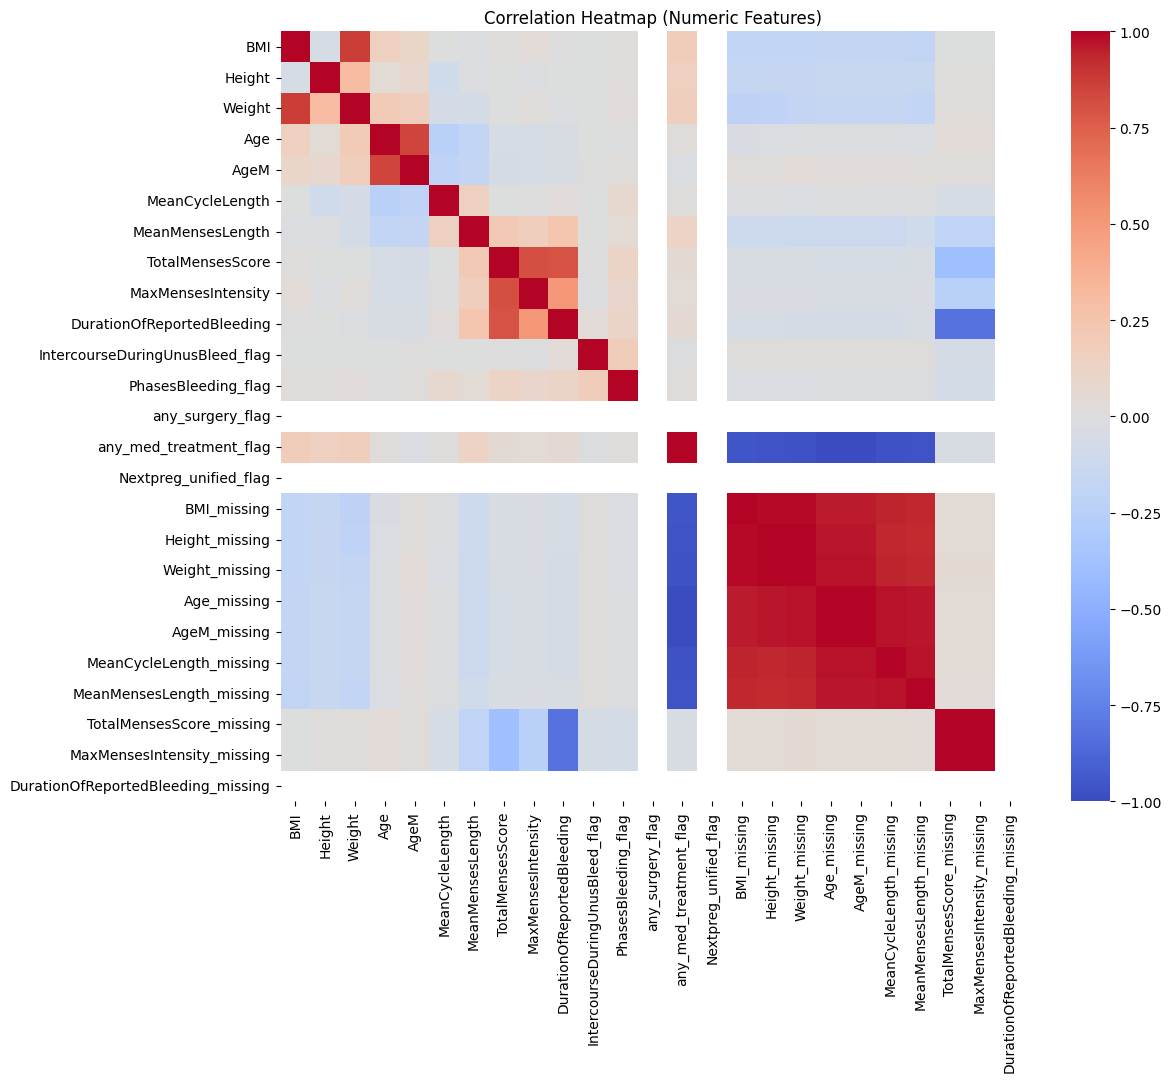

In [57]:
pink_colors = ["#FFC0CB", "#FF69B4", "#DB7093", "#C71585", "#FFB6C1"]

# Final Model Ready Dataset
dfm = df_model.copy()

# Separate types
num_cols = [c for c in dfm.columns if pd.api.types.is_numeric_dtype(dfm[c])]
cat_cols = [c for c in dfm.columns if c not in num_cols]

# Basic summaries
display(dfm[num_cols].describe().T)          # numeric stats
for c in cat_cols:
    print(f"\n{c} value counts:")
    print(dfm[c].value_counts(dropna=False).head(10))


plt.figure(figsize=(12,10))
sns.heatmap(dfm[num_cols].corr(numeric_only=True), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

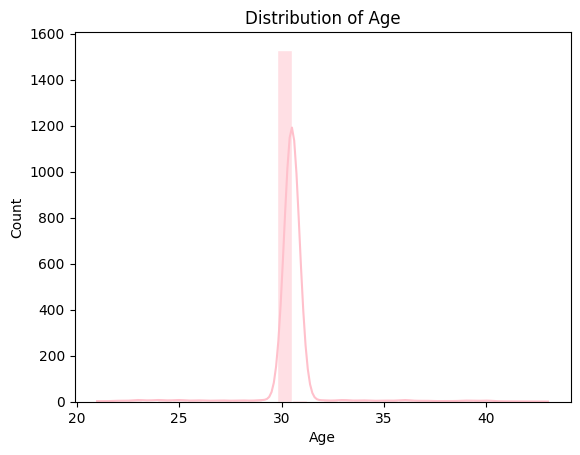

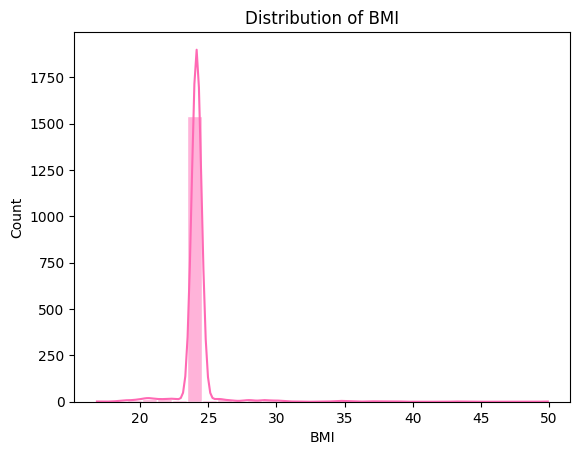

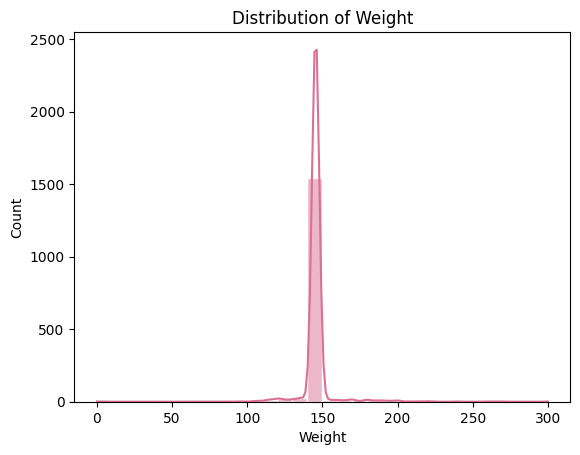

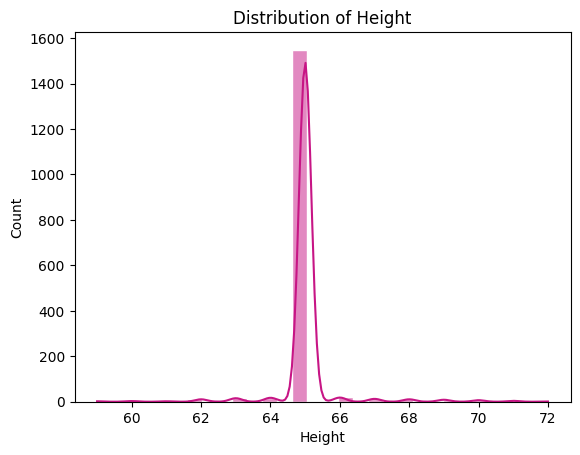

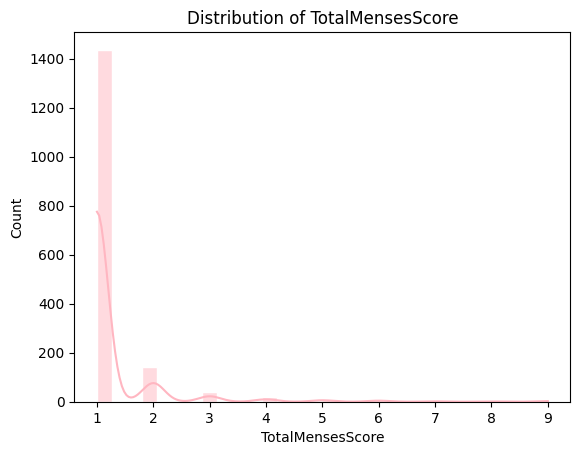

In [58]:
for i, col in enumerate (["Age", "BMI", "Weight", "Height", "TotalMensesScore"]):
    plt.figure()
    sns.histplot(dfm[col], kde=True, bins=30, color=pink_colors[i % len(pink_colors)], edgecolor='white')
    plt.title(f"Distribution of {col}")
    plt.show()
